# Ensemble Modeling

## Import Modules and Preparing the Dataset

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import data
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Creating a preprocessing function
def preprocess(data):
    def fix_age(age):
        if np.isnan(age):
            return -1
        else:
            return age
    data.loc[:, 'Age'] = data.Age.apply(fix_age)
    data.loc[:, 'Gender'] = data.Gender.apply(lambda s: int(s == 'female'))
    embarked = pd.get_dummies(data.Embarked, prefix='Emb')[['Emb_C','Emb_Q','Emb_S']]
    cols = ['Pclass','Gender','Age','SibSp','Parch','Fare']
    return pd.concat([data[cols], embarked], axis=1).values

In [4]:
# split the data in train and validation
train, val = train_test_split(data, test_size=0.2, random_state=11)
x_train = preprocess(train)
y_train = train.Survived.values
x_val = preprocess(val)
y_val = val.Survived.values
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(712, 9)
(712,)
(179, 9)
(179,)


# Using the Bagging Classifier

In [5]:
# import models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [6]:
# specifying hyperparameters and creating the models
# decision tree parameters
dt_params = {'criterion':'entropy',
            'random_state': 11}

dt = DecisionTreeClassifier(**dt_params)

# bagging classifier parameters
bc_params = {'base_estimator': dt,
            'n_estimators': 50,
            'max_samples': 0.5,
            'random_state': 11,
            'n_jobs': -1}

bc = BaggingClassifier(**bc_params)
bc.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        random_state=11),
                  max_samples=0.5, n_estimators=50, n_jobs=-1, random_state=11)

In [7]:
# making predictions and calculating accuracy for Bagging Classifier
bc_preds_train = bc.predict(x_train)
bc_preds_val = bc.predict(x_val)

print('Bagging Classfier:')
print(f'Accuracy on trainig data = {round(accuracy_score(y_train, bc_preds_train), 4)}')
print(f'Accuracy on validation data = {round(accuracy_score(y_val, bc_preds_val), 4)}')

Bagging Classfier:
Accuracy on trainig data = 0.9284
Accuracy on validation data = 0.8715


In [8]:
# making predictions and calculating accuracy for Decision Tree
dt.fit(x_train, y_train)

dt_preds_train = dt.predict(x_train)
dt_preds_val = dt.predict(x_val)

print('Decision Tree:')
print(f'Accuracy on training data = {round(accuracy_score(y_train, dt_preds_train), 4)}')
print(f'Accuracy on validation data = {round(accuracy_score(y_val, dt_preds_val), 4)}')

Decision Tree:
Accuracy on training data = 0.9831
Accuracy on validation data = 0.7709


## Building the Ensemble Model Using Random Forest

In [9]:
# import model
from sklearn.ensemble import RandomForestClassifier

In [10]:
# specifying hyperparameters fo the model
rf_params = {'n_estimators': 100,
            'criterion': 'entropy',
            'max_features': 0.5,
            'min_samples_leaf': 10,
            'random_state': 11,
            'n_jobs': -1}

In [11]:
# create the model
rf = RandomForestClassifier(**rf_params)

In [12]:
# fitting the model and making predictions
rf.fit(x_train, y_train)

rf_preds_train = rf.predict(x_train)
rf_preds_val = rf.predict(x_val)

In [13]:
# calculate the accuracy
print('Random Forest:')
print(f'Accuracy on training data = {round(accuracy_score(y_train, rf_preds_train), 4)}')
print(f'Accuracy on validation data = {round(accuracy_score(y_val, rf_preds_val), 4)}')

Random Forest:
Accuracy on training data = 0.8385
Accuracy on validation data = 0.8771


In [14]:
# saving the model
import pickle
filename = 'random_forest_clf.sav'
pickle.dump(rf, open(filename, 'wb'))

## Implementing Adaptative Boosting

In [15]:
# import model
from sklearn.ensemble import AdaBoostClassifier

In [16]:
# specifying the hyperparameters
dt_params = {
    'max_depth': 1,
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)
ab_params = {
    'n_estimators': 100,
    'base_estimator': dt,
    'random_state': 11
}

In [17]:
# create the model
ab = AdaBoostClassifier(**ab_params)

In [18]:
# fitting the model and making predictions
ab.fit(x_train, y_train)

ab_preds_train = ab.predict(x_train)
ab_preds_val = ab.predict(x_val)

In [19]:
# calculate accuracy
print(f'Adaptative Boosting: \n')
print(f'Accuracy on training data: {round(accuracy_score(y_train, ab_preds_train), 4)}')
print(f'Accuracy on validation data: {round(accuracy_score(y_val, ab_preds_val), 4)}')

Adaptative Boosting: 

Accuracy on training data: 0.8272
Accuracy on validation data: 0.8547


we claimed that the accuracy tends to increase with an increasing number of base estimators, but also that the model has a tendency to overfit if too many base estimators are used. Let's calculate the prediction accuracies so that we can find the point where the model begins to overfit the training data

In [20]:
ab_params = {
    'base_estimator': dt,
    'random_state': 11
}
n_estimator_values = list(range(10, 210, 10))
train_accuracies, val_accuracies = [], []
for n_estimators in n_estimator_values:
    ab = AdaBoostClassifier(n_estimators=n_estimators, **ab_params)
    ab.fit(x_train, y_train)
    ab_preds_train = ab.predict(x_train)
    ab_preds_val = ab.predict(x_val)
    train_accuracies.append(accuracy_score(y_true=y_train, y_pred=ab_preds_train))
    val_accuracies.append(accuracy_score(y_true=y_val, y_pred=ab_preds_val))

Plot a line graph to visualize the trend of the prediction accuracies on both the training and validation datasets

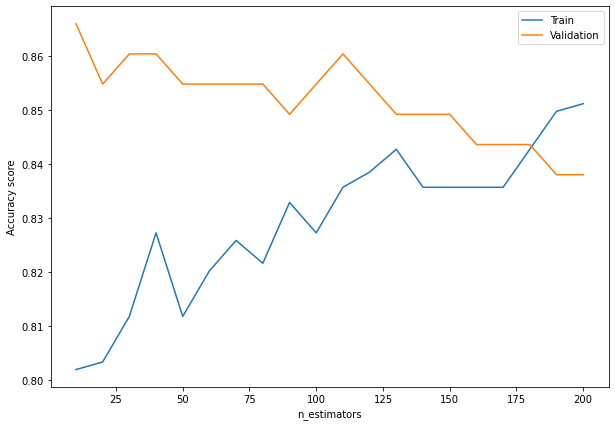

In [21]:
plt.figure(figsize=(10,7))
plt.plot(n_estimator_values, train_accuracies, label='Train')
plt.plot(n_estimator_values, val_accuracies, label='Validation')
plt.ylabel('Accuracy score')
plt.xlabel('n_estimators')
plt.legend()
plt.show()

## Implementing GradientBoostingClassifier to Build an Ensemble Model

In [22]:
# import model
from sklearn.ensemble import GradientBoostingClassifier

In [23]:
# specifying the hyperparameters and creating the model
gbc_params = {'n_estimators': 100,
             'max_depth': 3,
             'min_samples_leaf': 5,
             'random_state': 11}

gbc = GradientBoostingClassifier(**gbc_params)

In [24]:
# fitting the model and making predictions
gbc.fit(x_train, y_train)

gbc_preds_train = gbc.predict(x_train)
gbc_preds_val = gbc.predict(x_val)

In [25]:
print('Gradient Boosting Classifier')
print(f'Accuracy on training data = {round(accuracy_score(y_train, gbc_preds_train), 4)}')
print(f'Accuracy on validation data = {round(accuracy_score(y_val, gbc_preds_val), 4)}')

Gradient Boosting Classifier
Accuracy on training data = 0.8961
Accuracy on validation data = 0.8771


## Building a Stacked Model

In [26]:
# import models
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

In [27]:
# creating a new training set with additional columns for predictions from base predictors
x_train_metapreds = np.zeros((x_train.shape[0], x_train.shape[1]+2))
x_train_metapreds[:, :-2] = x_train
x_train_metapreds[:, -2:] = -1
print(x_train_metapreds)

[[ 3.  0. 16. ...  1. -1. -1.]
 [ 1.  0. 47. ...  1. -1. -1.]
 [ 3.  0. 32. ...  1. -1. -1.]
 ...
 [ 3.  0. 20. ...  1. -1. -1.]
 [ 3.  0. 22. ...  1. -1. -1.]
 [ 3.  0. 25. ...  0. -1. -1.]]


In [28]:
# train base models with k fold
kf = KFold(n_splits=5)

for train_indices, val_indices in kf.split(x_train):
    kfold_x_train, kfold_x_val = x_train[train_indices], x_train[val_indices]
    kfold_y_train, kfold_y_val = y_train[train_indices], y_train[val_indices]
    
    svm = LinearSVC(random_state=11, max_iter=1000)
    svm.fit(kfold_x_train, kfold_y_train)
    svm_pred = svm.predict(kfold_x_val)
    
    knn = KNeighborsClassifier(n_neighbors=4)
    knn.fit(kfold_x_train, kfold_y_train)
    knn_pred = knn.predict(kfold_x_val)
    
    x_train_metapreds[val_indices, -2] = svm_pred
    x_train_metapreds[val_indices, -1] = knn_pred

In [29]:
# create a new validation set
x_val_metapreds = np.zeros((x_val.shape[0], x_val.shape[1]+2))
x_val_metapreds[:, :-2] = x_val
x_val_metapreds[:, -2:] = -1
print(x_val_metapreds)

[[ 3.  1. -1. ...  1. -1. -1.]
 [ 3.  0. 27. ...  1. -1. -1.]
 [ 3.  0. -1. ...  0. -1. -1.]
 ...
 [ 3.  0. 22. ...  1. -1. -1.]
 [ 1.  0. -1. ...  1. -1. -1.]
 [ 1.  0. 25. ...  0. -1. -1.]]


In [30]:
# fitting the model and making predictions
svm = LinearSVC(random_state=11, max_iter=1000)
svm.fit(x_train, y_train)

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)

svm_pred = svm.predict(x_val)
knn_pred = knn.predict(x_val)

x_val_metapreds[:, -2] = svm_pred
x_val_metapreds[:, -1] = knn_pred

In [31]:
# Train the stacked model and use the final predictions to calculate accuracy
lr = LogisticRegression(random_state=11)
lr.fit(x_train_metapreds, y_train)

lr_preds_train = lr.predict(x_train_metapreds)
lr_preds_val = lr.predict(x_val_metapreds)

print('Stacked Classifier:')
print(f'Accuracy on training data = {round(accuracy_score(y_true=y_train, y_pred=lr_preds_train), 4)}')
print(f'Accuracy on validation data = {round(accuracy_score(y_true=y_val, y_pred=lr_preds_val), 4)}')

Stacked Classifier:
Accuracy on training data = 0.7907
Accuracy on validation data = 0.838


In [32]:
# Compare the accuracy with that of base models
print('SVM:')
print(f'Accuracy on training data = {round(accuracy_score(y_true=y_train, y_pred=svm.predict(x_train)), 4)}')
print(f'Accuracy on validation data = {round(accuracy_score(y_true=y_val, y_pred=svm_pred), 4)}')
                                       
print('kNN:')
print(f'Accuracy on training data = {round(accuracy_score(y_true=y_train, y_pred=knn.predict(x_train)), 4)}')
print(f'Accuracy on validation data = {round(accuracy_score(y_true=y_val, y_pred=knn_pred), 4)}')

SVM:
Accuracy on training data = 0.6531
Accuracy on validation data = 0.6648
kNN:
Accuracy on training data = 0.7921
Accuracy on validation data = 0.6816


In [33]:
# saving the model
filename = 'stacked_linear_regression.sav'
pickle.dump(lr, open(filename, 'wb'))